In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
# import data (just need 1 file)
dfs = []
for i in range(2,6):
    dataFile = "/Users/brandonmanley/Documents/nBody/data/brutusSim/"+str(i)+"body/brutus10_1_"+str(i)+".csv"        
    df = pd.read_csv(dataFile, index_col=False)
    df = df.head(2560*100)
    dfs.append(df)
    

In [90]:
# energy conservation

def potentialEnergy(df, nbod): # sets total potential energy  (using G =1)
    
    potEnergy = 0
    for n in range(1, nbod+1):
        nthBody = str(n)

        for i in range(1, nbod+1):
            if i <= n: continue
            mass_term = 0
            x_sep = 0
            y_sep = 0
            r_sep = 0
                
            mass_term = df['m'+nthBody]*df['m'+str(i)]
            x_sep = (df['xf'+nthBody] - df['xf'+str(i)])**2
            y_sep = (df['yf'+nthBody] - df['yf'+str(i)])**2
            r_sep = (x_sep + y_sep)**0.5
            potEnergy -= mass_term / r_sep

    df['u'] = potEnergy
    
def kineticEnergy(df, nbod): # sets total kinetic energy 
    
    kinEnergy = 0
    for n in range(1, nbod+1):
        nthBody = str(n)
        kv_term = 0
        
        kv_term = df['dxf'+nthBody]**2 + df['dyf'+nthBody]**2
        kinEnergy += 0.5*df['m'+nthBody]*kv_term
    
    df['k'] = kinEnergy

        
def initialEnergy(df, nbod): # sets initial energy 
    
    # kinetic
    kinEnergy = 0
    for n in range(1, nbod+1):
        nthBody = str(n)
        kv_term = 0
        
        kv_term = df['dx'+nthBody]**2 + df['dy'+nthBody]**2
        kinEnergy += 0.5*df['m'+nthBody]*kv_term
    
    df['ik'] = kinEnergy
    
    # potential
    potEnergy = 0
    for n in range(1, nbod+1):
        nthBody = str(n)

        for i in range(1, nbod+1):
            if i <= n: continue
            mass_term = 0
            x_sep = 0
            y_sep = 0
            r_sep = 0
                
            mass_term = df['m'+nthBody]*df['m'+str(i)]
            x_sep = (df['x'+nthBody] - df['x'+str(i)])**2
            y_sep = (df['y'+nthBody] - df['y'+str(i)])**2
            r_sep = (x_sep + y_sep)**0.5
            potEnergy -= mass_term / r_sep

    df['iu'] = potEnergy
    df['ie'] = df['ik'] + df['iu']

    
for i in range(2, 6):
    initialEnergy(dfs[i-2], i)
    potentialEnergy(dfs[i-2], i)
    kineticEnergy(dfs[i-2], i)
    dfs[i-2]['e'] = dfs[i-2]['k'] + dfs[i-2]['u']

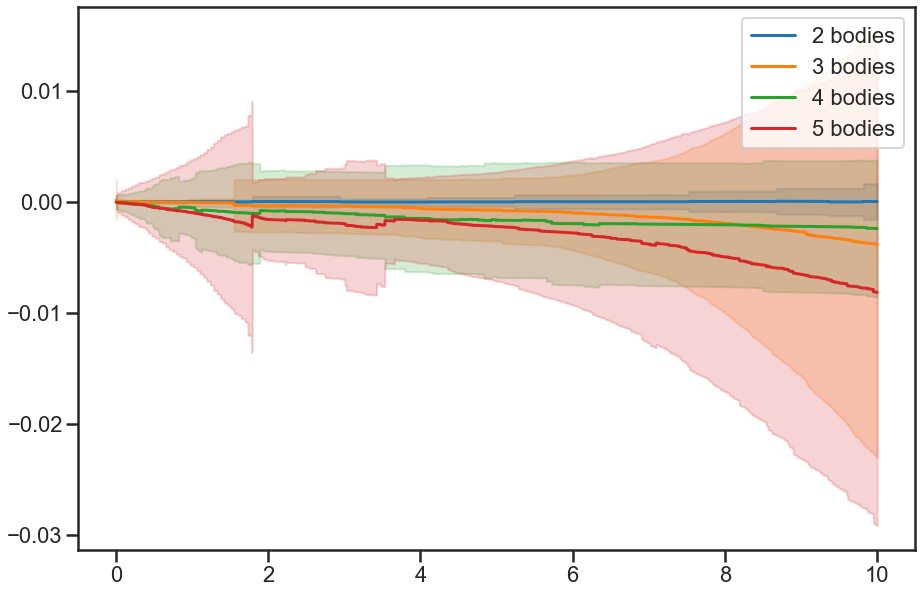

In [91]:
def e_time(): # energy vs time plot
    sns.set_context("poster")
    sns.set_style("ticks")
    fig, ax = plt.subplots(figsize=(15,10))
    for df in dfs:
        sns.lineplot(df['t'], df['e'] - df['ie'], ax=ax, ci='sd')
    ax.set(xlabel='', ylabel='')
    ax.legend(('2 bodies', '3 bodies', '4 bodies', '5 bodies'), loc='best')
    fig.savefig("de_time_plot.pdf", format='pdf', dpi=1000)
 
e_time()

In [93]:
# momentum conservation

def momentum(df, nbod):
    mom_x = 0
    mom_y = 0
    
    for n in range(1, nbod+1):
        nthBody = str(n)
        x_term = 0
        y_term = 0
        
        x_term = df['m'+nthBody]*df['dxf'+nthBody]
        y_term = df['m'+nthBody]*df['dyf'+nthBody]
        
        mom_x += x_term
        mom_y += y_term
    
    df['px'] = mom_x
    df['py'] = mom_y
    df['p']  = (df['px']**2 + df['py']**2)**0.5
        

def initialMomentum(df, nbod):
    mom_x = 0
    mom_y = 0
    
    for n in range(1, nbod+1):
        nthBody = str(n)
        x_term = 0
        y_term = 0
        
        x_term = df['m'+nthBody]*df['dx'+nthBody]
        y_term = df['m'+nthBody]*df['dy'+nthBody]
        
        mom_x += x_term
        mom_y += y_term
    
    df['ipx'] = mom_x
    df['ipy'] = mom_y
    df['ip'] = (df['ipx']**2 + df['ipy']**2)**0.5

for i in range(2, 6):
    initialMomentum(dfs[i-2], i)
    momentum(dfs[i-2], i)

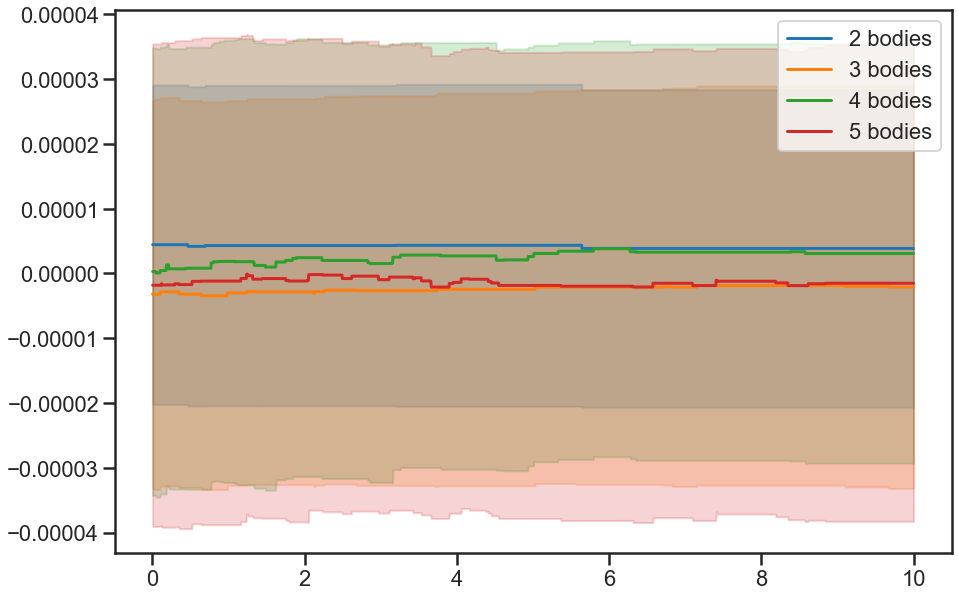

In [94]:
def p_time(): # momentum vs time plot
    sns.set_context("poster")
    sns.set_style("ticks")
    fig, ax = plt.subplots(figsize=(15,10))
    for df in dfs:
        sns.lineplot(df['t'], df['p'] - df['ip'], ax=ax, ci='sd')
    ax.set(xlabel='', ylabel='')
    ax.legend(('2 bodies', '3 bodies', '4 bodies', '5 bodies'), loc='best')
    fig.savefig("dp_time_plot.pdf", format='pdf', dpi=1000)

p_time()